In [62]:


import numpy as np
import pandas as pd


In [63]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loding dataset**#

In [64]:

train_df_full = pd.read_csv('/content/drive/MyDrive/playground-series-s4e12/train.csv')
train_df = train_df_full[0:60000]

train_df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [65]:
test_df= pd.read_csv('/content/drive/MyDrive/playground-series-s4e12/test.csv')
test_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [66]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

# Exploring dataset

In [67]:
train_df.shape
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    60000 non-null  int64  
 1   Age                   59094 non-null  float64
 2   Gender                60000 non-null  object 
 3   Annual Income         57685 non-null  float64
 4   Marital Status        59063 non-null  object 
 5   Number of Dependents  54552 non-null  float64
 6   Education Level       60000 non-null  object 
 7   Occupation            42059 non-null  object 
 8   Health Score          56395 non-null  float64
 9   Location              60000 non-null  object 
 10  Policy Type           60000 non-null  object 
 11  Previous Claims       41789 non-null  float64
 12  Vehicle Age           59998 non-null  float64
 13  Credit Score          53019 non-null  float64
 14  Insurance Duration    60000 non-null  float64
 15  Policy Start Date  

**#Checking Unique values for columns**#

In [68]:
for column in train_df.columns:
    distinct_values = train_df[column].unique()
    distinct_count = len(distinct_values)
    print(f"Feature: {column}")
    print(f"Distinct Count: {distinct_count}")
    print(f"Distinct Values: {distinct_values}")
    print()

Feature: id
Distinct Count: 60000
Distinct Values: [    0     1     2 ... 59997 59998 59999]

Feature: Age
Distinct Count: 48
Distinct Values: [19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 nan 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.]

Feature: Gender
Distinct Count: 2
Distinct Values: ['Female' 'Male']

Feature: Annual Income
Distinct Count: 24712
Distinct Values: [10049. 31678. 25602. ... 52341.  7012. 30599.]

Feature: Marital Status
Distinct Count: 4
Distinct Values: ['Married' 'Divorced' 'Single' nan]

Feature: Number of Dependents
Distinct Count: 6
Distinct Values: [ 1.  3.  2.  0.  4. nan]

Feature: Education Level
Distinct Count: 4
Distinct Values: ["Bachelor's" "Master's" 'High School' 'PhD']

Feature: Occupation
Distinct Count: 4
Distinct Values: ['Self-Employed' nan 'Employed' 'Unemployed']

Feature: Health Score
Distinct Count: 49123
Distinct Values: [22.59876067 15.56973

# #Missing value in the columns

In [69]:
# Calculate missing data count and percentage
missing_data = train_df.isna().sum()
missing_percentage = (missing_data / len(train_df)) * 100
columns = train_df.columns.tolist()

# Filter only columns with missing data
missing_df = pd.DataFrame({
    'Columns': columns,
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).loc[missing_data > 0].reset_index(drop=True)

print(missing_df)

                Columns  Missing Count  Missing Percentage
0                   Age            906            1.510000
1         Annual Income           2315            3.858333
2        Marital Status            937            1.561667
3  Number of Dependents           5448            9.080000
4            Occupation          17941           29.901667
5          Health Score           3605            6.008333
6       Previous Claims          18211           30.351667
7           Vehicle Age              2            0.003333
8          Credit Score           6981           11.635000
9     Customer Feedback           3920            6.533333


**Handling the missing value**#

**Dropping Customer Feedback, Vehical Age features**#

In [70]:
train_df = train_df.drop(['Vehicle Age', 'Customer Feedback'], axis = 1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    60000 non-null  int64  
 1   Age                   59094 non-null  float64
 2   Gender                60000 non-null  object 
 3   Annual Income         57685 non-null  float64
 4   Marital Status        59063 non-null  object 
 5   Number of Dependents  54552 non-null  float64
 6   Education Level       60000 non-null  object 
 7   Occupation            42059 non-null  object 
 8   Health Score          56395 non-null  float64
 9   Location              60000 non-null  object 
 10  Policy Type           60000 non-null  object 
 11  Previous Claims       41789 non-null  float64
 12  Credit Score          53019 non-null  float64
 13  Insurance Duration    60000 non-null  float64
 14  Policy Start Date     60000 non-null  object 
 15  Smoking Status     

**#Median Imputation for Age Feature**


In [71]:
median_age = train_df['Age'].median()
train_df['Age'] = train_df['Age'].fillna(median_age)

**#Mode Imputation for Occupation**#

In [72]:
mode_occupation = train_df['Occupation'].mode()[0]
train_df['Occupation']= train_df['Occupation'].fillna(mode_occupation)

# Group-Based Median Imputation of Annual Income

In [73]:
train_df['Annual Income'] = train_df.groupby('Occupation')['Annual Income'].transform(
    lambda x: x.fillna(x.median())
)


**Group based Imputation of Health Score**#


In [74]:
train_df['Health Score'] = train_df.groupby('Occupation')['Health Score'].transform(
    lambda x: x.fillna(x.median())
)

**#Imputation of Previous Claim**#

In [75]:
train_df['Previous Claims'] = train_df.groupby('Health Score')['Previous Claims'].transform(
    lambda x: x.fillna(x.mean())
)

In [76]:
# Fallback Imputation for Remaining Missing Values
train_df['Previous Claims']= train_df['Previous Claims'].fillna(train_df['Previous Claims'].mean())

**# Median Imputation of credit score**

In [77]:
median_credit = train_df['Credit Score'].median()
train_df['Credit Score'] = train_df['Credit Score'].fillna(median_credit)

In [78]:
train_df['Marital Status']= train_df['Marital Status'].fillna('Unknown')
train_df['Number of Dependents'] = train_df['Number of Dependents'].fillna(0)
train_df['Insurance Duration'] = train_df['Insurance Duration'].fillna(0)

In [79]:
# Calculate missing data count and percentage
missing_data = train_df.isna().sum()
print(missing_data)

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64


#Correlation between the features

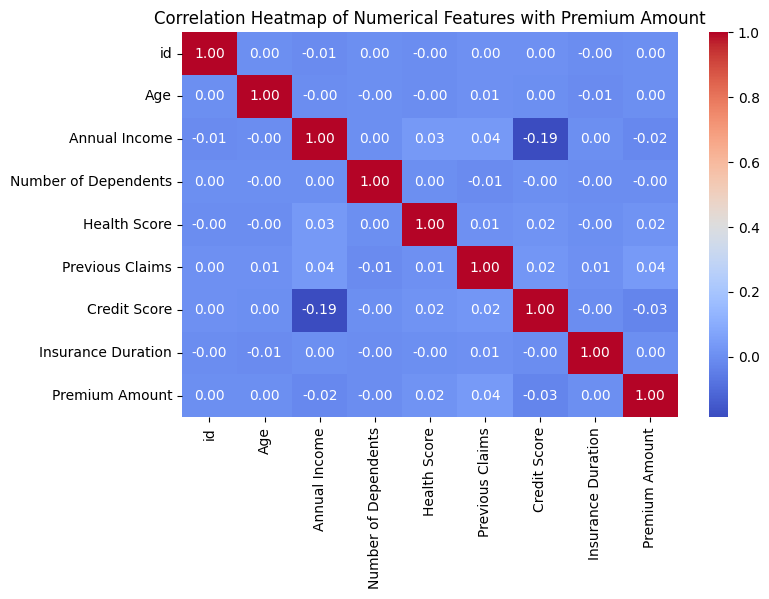

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

#Identify Numerical and Non-Numerical Columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
non_numerical_columns = train_df.select_dtypes(include=['object']).columns

# Create DataFrames for Numerical and Non-Numerical Data
numerical_df = train_df[numerical_columns].copy()
non_numerical_df = train_df[non_numerical_columns].copy()

# Add the 'Premium Amount' column to both DataFrames
numerical_df['Premium Amount'] = train_df['Premium Amount']
non_numerical_df['Premium Amount'] = train_df['Premium Amount']

#Calculate Correlation Matrices for Numerical Columns
numerical_corr = numerical_df.corr()


# Plot Heatmaps for Numerical Data Correlation
plt.figure(figsize=(8, 5))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features with Premium Amount')
plt.show()



#Outlier Detection

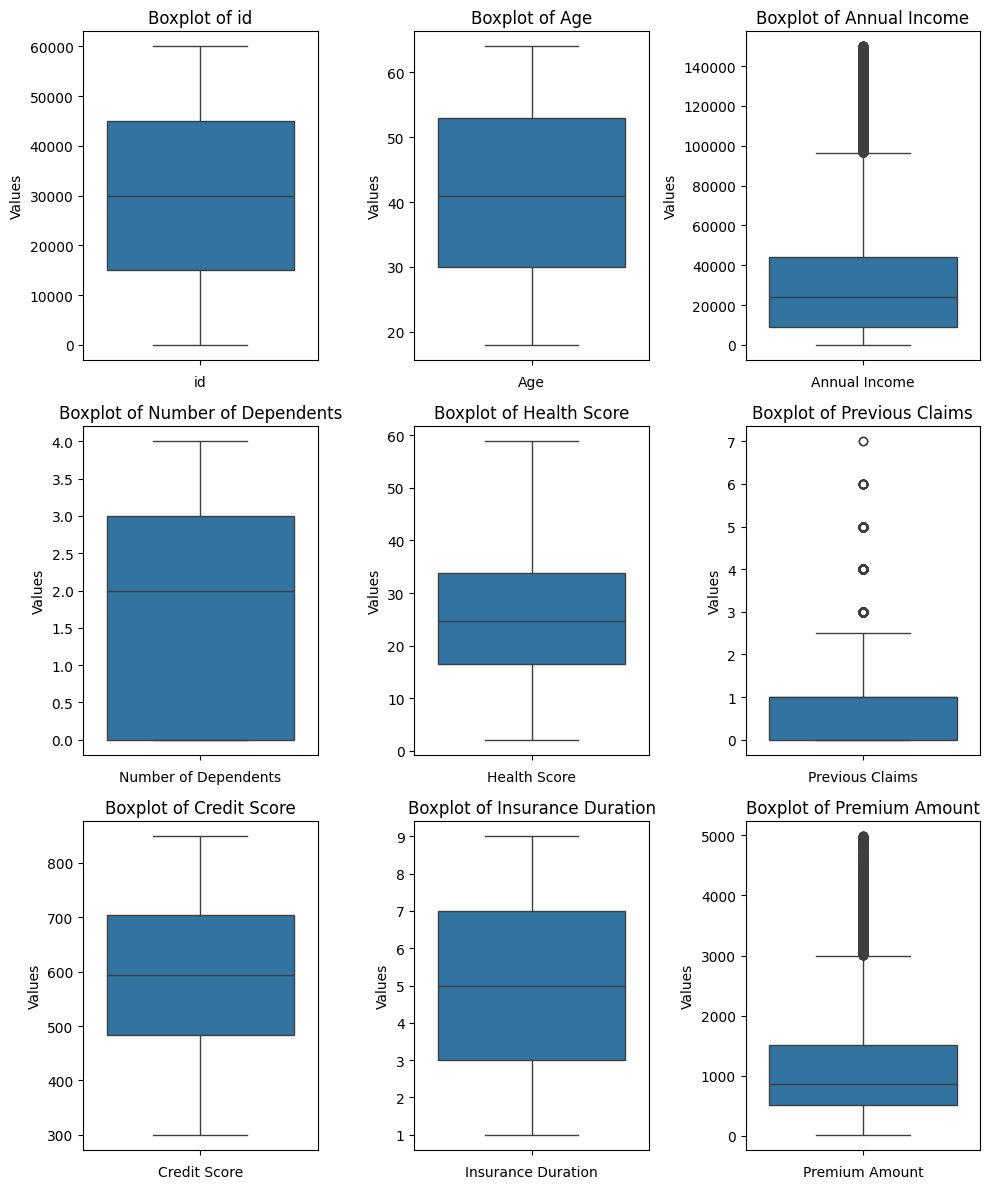

In [81]:
#Plot Boxplots in Subplots
num_features = len(numerical_columns)
num_plots_per_row = 3
num_rows = (num_features // num_plots_per_row) + (num_features % num_plots_per_row > 0)
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 4 * num_rows))
# Flatten axes array if more than one row
if num_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

for ax, feature in zip(axes, numerical_columns):
    sns.boxplot(y=train_df[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Values')
# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [82]:
train_df.describe()


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Credit Score,Insurance Duration,Premium Amount
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000
mean,29999.500000,41.234733,32557.007300,1.823817,25.588573,0.997804,592.392450,5.01535,1104.997267
std,17320.652413,13.446287,31649.744465,1.469154,11.831973,0.839791,140.722086,2.60055,867.672596
min,0.000000,18.000000,17.000000,0.000000,2.068843,0.000000,300.000000,1.00000,20.000000
25%,14999.750000,30.000000,8881.000000,0.000000,16.568975,0.000000,484.000000,3.00000,514.000000
50%,29999.500000,41.000000,23952.000000,2.000000,24.723336,0.997804,594.000000,5.00000,872.000000
75%,44999.250000,53.000000,43973.000000,3.000000,33.844700,1.000000,704.000000,7.00000,1510.000000
max,59999.000000,64.000000,149995.000000,4.000000,58.886035,7.000000,849.000000,9.00000,4984.000000


#Transformatiom of positively skewness

In [83]:
from scipy.stats import skew
# Select only numeric columns
numeric_df = train_df.select_dtypes(include=['number'])
# Check skewness of each numeric variable
skewness = numeric_df.apply(skew)
print("Skewness before transformation:\n", skewness)
# Identify variables with skewness > 1
high_skew_columns = skewness[skewness > 1].index.tolist()
print("Variables with skewness > 1:", high_skew_columns)

Skewness before transformation:
 id                      0.000000
Age                    -0.020341
Annual Income           1.516520
Number of Dependents    0.132451
Health Score            0.301651
Previous Claims         1.050387
Credit Score           -0.115641
Insurance Duration     -0.004644
Premium Amount          1.254144
dtype: float64
Variables with skewness > 1: ['Annual Income', 'Previous Claims', 'Premium Amount']


In [84]:
train_df['Annual Income'] = np.log1p(train_df['Annual Income'])  # log1p(x) = log(1 + x)
train_df['Previous Claims'] = np.log1p(train_df['Previous Claims'])


In [85]:
for col in high_skew_columns:
    skewness = train_df[col].skew()
    print(f"{col}: Skewness after log transformation = {skewness}")

Annual Income: Skewness after log transformation = -1.048453596225034
Previous Claims: Skewness after log transformation = -0.11391545540981596
Premium Amount: Skewness after log transformation = 1.2541755388560296


In [86]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# Apply the encoder to the categorical columns
encoded_data = ordinal_encoder.fit_transform(train_df[non_numerical_columns])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(
    encoded_data,
    columns=non_numerical_columns,
    index=train_df.index
)

# Combine encoded categorical data with numerical columns
train_df_encoded = pd.concat([train_df.drop(columns=non_numerical_columns), encoded_df], axis=1)

print(train_df_encoded.head())

   id   Age  Annual Income  Number of Dependents  Health Score  \
0   0  19.0       9.215328                   1.0     22.598761   
1   1  39.0      10.363409                   3.0     15.569731   
2   2  23.0      10.150465                   3.0     47.177549   
3   3  21.0      11.862568                   2.0     10.938144   
4   4  21.0      10.587897                   1.0     20.376094   

   Previous Claims  Credit Score  Insurance Duration  Premium Amount  Gender  \
0         1.098612         372.0                 5.0          2869.0     0.0   
1         0.693147         694.0                 2.0          1483.0     0.0   
2         0.693147         594.0                 3.0           567.0     1.0   
3         0.693147         367.0                 1.0           765.0     1.0   
4         0.000000         598.0                 4.0          2022.0     1.0   

   Marital Status  Education Level  Occupation  Location  Policy Type  \
0             1.0              0.0         1.0   

In [87]:

X_train = train_df_encoded.drop('Premium Amount', axis=1) # Features
y_train = train_df_encoded['Premium Amount'] # Target

In [88]:
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(random_state=42)
# rf_reg.fit(X_train, y_train)

In [89]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [90]:
test_df = test_df.drop(['Vehicle Age', 'Customer Feedback'], axis=1)



# Apply the encoder to the categorical columns
encoded_data_test = ordinal_encoder.fit_transform(test_df[non_numerical_columns])

# Convert the encoded data to a DataFrame
encoded_df_test = pd.DataFrame(
    encoded_data_test,
    columns=non_numerical_columns,
    index=test_df.index
)

# Combine encoded categorical data with numerical columns
test_df_encoded = pd.concat([test_df.drop(columns=non_numerical_columns), encoded_df_test], axis=1)

print(test_df_encoded.head())


        id   Age  Annual Income  Number of Dependents  Health Score  \
0  1200000  28.0         2310.0                   4.0      7.657981   
1  1200001  31.0       126031.0                   2.0     13.381379   
2  1200002  47.0        17092.0                   0.0     24.354527   
3  1200003  28.0        30424.0                   3.0      5.136225   
4  1200004  24.0        10863.0                   2.0     11.844155   

   Previous Claims  Credit Score  Insurance Duration  Gender  Marital Status  \
0              NaN           NaN                 1.0     0.0             NaN   
1              NaN         372.0                 8.0     0.0             1.0   
2              NaN         819.0                 9.0     0.0             0.0   
3              1.0         770.0                 5.0     0.0             0.0   
4              NaN         755.0                 7.0     1.0             0.0   

   Education Level  Occupation  Location  Policy Type  Policy Start Date  \
0              0

In [91]:
#predictions = rf_reg.predict(test_df_encoded)
predictions = model.predict(test_df_encoded)

In [92]:
predictions

array([ 593.87463803, 1187.73699001, 1535.41714947, ...,  776.85207927,
       1099.80267418,  601.23603546])

In [93]:

output_df = pd.DataFrame({'id': test_df_encoded['id'], 'Premium Amount': predictions})

In [94]:
output_df

,id,Premium Amount
0,1200000,593.874638
1,1200001,1187.736990
2,1200002,1535.417149
3,1200003,1124.354380
4,1200004,650.384635
...,...,...
799995,1999995,1206.045211
799996,1999996,1261.465831
799997,1999997,776.852079
799998,1999998,1099.802674


In [95]:
output_df.to_csv('output.csv', index=False)
